# DSC 530 Final Project
## Austin Animal Center Shelter Outcomes: Black Cat Outlook

By: Chase Lemons

Source of Data: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and/version/1

Premise:

When we began this course, one of the first discussion posts was about sayings or myths we took for granted just because. So another myth that I have heard before was, black cats aren't wanted. Thus, the question is, do black cats get treated differently, or have a different outcome, than not black cats?

### Part 1

To begin we must import the data and get familiar with it. Thus, we will read in the data and put it in the dataframe Shleter_cat. To begin, we want to get a bit of a summary of what we are looking at, so we use the head() function to get this glimpse.

This gives us the insight to narrow our research to know which columns we would like to work with. 

outcome_age_(years)
breed
color
outcome_type
sex
spay/neuter

In [193]:
import pandas as pd
import numpy as np

Shelter_cat = pd.read_csv("/Users/lemonswilliams/Documents/DSC 530/DSC530 Final/aac_shelter_cat_outcome_eng.csv")
Shelter_cat['dateofbirth'] = pd.to_datetime(Shelter_cat['date_of_birth'])
Shelter_cat['datetime2'] = pd.to_datetime(Shelter_cat['datetime'])

Shelter_cat['cat_age'] = (Shelter_cat['datetime2'] - Shelter_cat['dateofbirth'])
Shelter_cat["cat_age"] = (Shelter_cat["cat_age"] / np.timedelta64(1, 'D')).astype(int)
Shelter_cat["cat_age"] = Shelter_cat["cat_age"]/365

Shelter_cat.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat,dateofbirth,datetime2,cat_age
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,NaN,False,True,tabby,orange,NaN,orange,2014-07-07,2014-07-22 16:04:00,0.041096
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,NaN,False,True,tabby,blue,white,blue,2014-06-16,2014-08-14 18:45:00,0.161644
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,NaN,False,True,NaN,white,black,white,2014-03-26,2014-06-29 17:45:00,0.260274
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,NaN,False,True,NaN,black,white,black,2013-03-27,2014-03-28 14:55:00,1.002740
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,NaN,False,True,NaN,black,white,black,2013-12-16,2014-01-09 19:29:00,0.065753


In [194]:
black_list = ["black","/black","black/","black/black","black /black"]
sex_list = ["Female"]

sex_flag = []
color_flag = []
for x in Shelter_cat["color"]:
    if x in black_list:
        y = 1
    else:
        y = 0
    color_flag.append(y)

Shelter_cat["color_flag"] = color_flag  


for x in Shelter_cat["sex"]:
    if x in sex_list:
        y = 1
    else:
        y = 0
    sex_flag.append(y)

Shelter_cat["sex_flag"] = sex_flag 

In [195]:
Shelter_cat1 = Shelter_cat[["cat_age", "breed", "color_flag" , "outcome_type" , "sex_flag" , "Spay/Neuter"]]
Shelter_cat1.head()

,cat_age,breed,color_flag,outcome_type,sex_flag,Spay/Neuter
0,0.041096,domestic shorthair,0,Transfer,0,No
1,0.161644,domestic shorthair,0,Adoption,1,No
2,0.260274,domestic shorthair,0,Adoption,1,Yes
3,1.002740,domestic mediumhair,0,Return to Owner,1,Yes
4,0.065753,domestic shorthair,0,Transfer,0,No


### Part 2

Now we need to start visualizing and understand what this data has.

In [196]:
import thinkstats2
import thinkplot

#### 1. Histogram of Cat Age

No handles with labels found to put in legend.


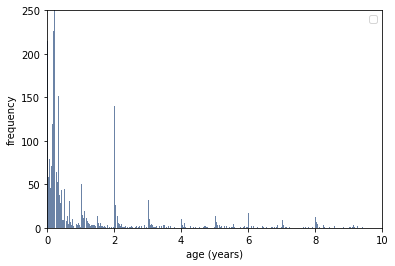

In [197]:
cat_age = Shelter_cat1["cat_age"]

cat_age_hist = thinkstats2.Hist(cat_age)

thinkplot.Hist(cat_age_hist)
thinkplot.Config(xlabel='age (years)', ylabel='frequency', xlim=[0, 10], ylim=[0,250])

#### 2. Breeds

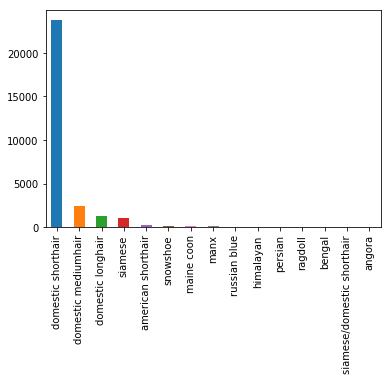

In [198]:
Shelter_cat1['breed'].value_counts()[:15].plot(kind='bar')

#### 3. Color (Expanded Chart and Histogram)

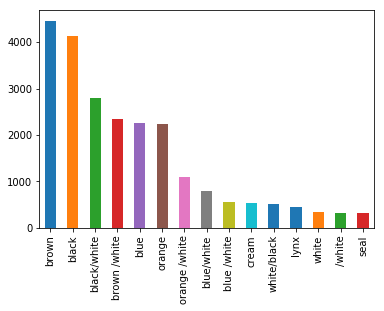

In [199]:
Shelter_cat['color'].value_counts()[:15].plot(kind='bar')

No handles with labels found to put in legend.


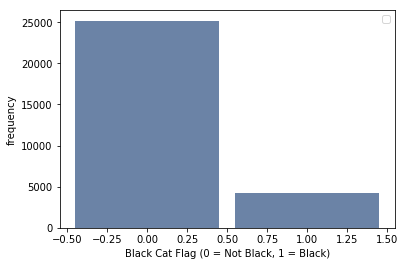

In [200]:
cat_black_flag = Shelter_cat1["color_flag"]

cat_black_hist = thinkstats2.Hist(cat_black_flag)

thinkplot.Hist(cat_black_hist)
thinkplot.Config(xlabel='Black Cat Flag (0 = Not Black, 1 = Black)', ylabel='frequency')

#### 4. Outcome

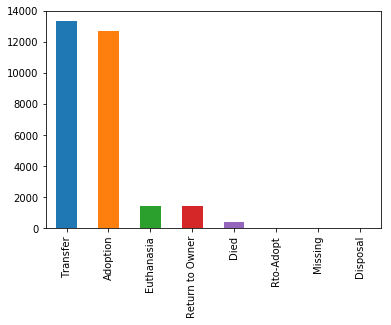

In [201]:
Shelter_cat['outcome_type'].value_counts().plot(kind='bar')

#### 5. Sex

No handles with labels found to put in legend.


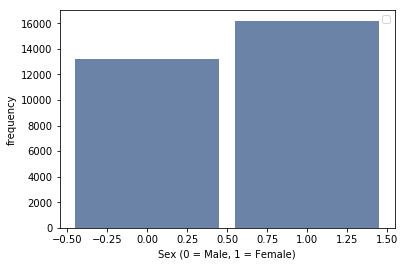

In [202]:
sex_freq = thinkstats2.Hist(Shelter_cat["sex_flag"])

thinkplot.Hist(sex_freq)
thinkplot.Config(xlabel='Sex (0 = Male, 1 = Female)', ylabel='frequency')

### Part 3

Descriptive Statistics

##### 1. Cat Age
The mean, variance and standard deviation for the age of the cat in years is:

In [203]:
print("Mean: ",round(Shelter_cat1.cat_age.mean(),2))
print("Variance: ",round(Shelter_cat1.cat_age.var(),2))
print("Standard Deviation: ",round(Shelter_cat1.cat_age.std(),2))

Mean:  1.46
Variance:  7.26
Standard Deviation:  2.69


#### 2. Breeds

Since breeds are a categorical data type, the mean, variance, and standard deviation are not taht applicable here. We can see however, the types of the breeds that go through the shelter. By Far Domestic Shorthair is the most common of the breeds. 

#### 3. Color

So this is the really important variable for us, since we want to know about black cats and their statuses. Referencing Part 2 section 3. There was some clean up that I did around color. So I wanted to look at a bar chart of the data to see all of the colors in the raw format. But then I did a histogram to see how many black cats versus not black cats. By the looks of the histogram there is a total of 30,000 cats, with roughly 5,000 black and 25,000 not black.

#### 4. Outcome

The types of outcome are listed below.

In [205]:
Shelter_cat1.outcome_type.unique()

array(['Transfer', 'Adoption', 'Return to Owner', 'Died', 'Euthanasia',
       'Missing', 'Disposal', 'Rto-Adopt', nan], dtype=object)

Transfer and Adoption are the most prevalent outcomes when it comes to outcomes.

#### 5. Sex

There are only two types of sex. Male or Female. There are about 3,000 more females than males.

### Part 4

PMF

In [255]:
Outcome_type_num = []
for x in Shelter_cat["outcome_type"]:
    if x == "Transfer":
        y = 0
    elif x == "Adoption":
        y = 1
    elif x == "Return to Owner":
        y = 2
    elif x == "Died":
        y = 3
    elif x == "Euthanasia":
        y = 4
    elif x == "Missing":
        y = 5
    elif x == "Disposal":
        y = 6
    elif x == "Rto-Adopt":
        y = 7
    else:
        y = 8
    Outcome_type_num.append(y)

Shelter_cat["Outcome_type_num"] = Outcome_type_num  

In [256]:
Black_Cats = Shelter_cat[(Shelter_cat.color_flag == 1)]
Other_Cats = Shelter_cat[(Shelter_cat.color_flag == 0)]

Black_Cat_Outcome_Pmf = thinkstats2.Pmf(Black_Cats.Outcome_type_num, label="Black Cats")
Other_Cat_Outcome_Pmf = thinkstats2.Pmf(Other_Cats.Outcome_type_num, label="Other Cats")

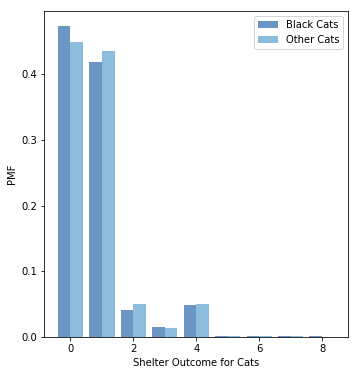

In [257]:
width=.4
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(Black_Cat_Outcome_Pmf, align='right', width=width)
thinkplot.Hist(Other_Cat_Outcome_Pmf, align='left', width=width)
thinkplot.Config(xlabel="Shelter Outcome for Cats", ylabel='PMF')

#For Reference:
#Transfer = 0
#Adoption = 1
#Return to Owner = 2
#Died = 3
#Euthanasia = 4
#Missing = 5
#Disposal = 6
#Rto-Adopt = 7
#Everything else = 8

### Part 5
CDF

In [258]:
Black_Cat_Outcome_Cdf = thinkstats2.Cdf(Black_Cats.Outcome_type_num, label="Black Cats")
Other_Cat_Outcome_Cdf = thinkstats2.Cdf(Other_Cats.Outcome_type_num, label="Other Cats")

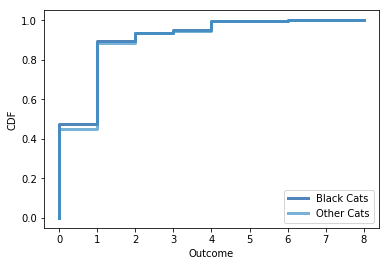

In [259]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([Black_Cat_Outcome_Cdf, Other_Cat_Outcome_Cdf])
thinkplot.Config(xlabel='Outcome', ylabel='CDF')

The cdf to the right shows that the most common outcome types are transfers and adoptions. As well, we compared the cdf of black cats versus other cats and you can see that they have very similar outcomes. Making me think that black cats are treated close to equal to not black cats.

### Part 6

Analytical Distribution

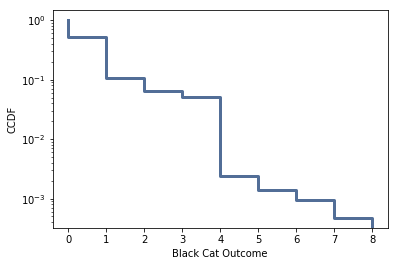

In [266]:
thinkplot.Cdf(Black_Cat_Outcome_Cdf, complement=True)
thinkplot.Config(xlabel='Black Cat Outcome',
                 ylabel='CCDF', yscale='log', loc='upper right')

### Part 7

Scatter Plot

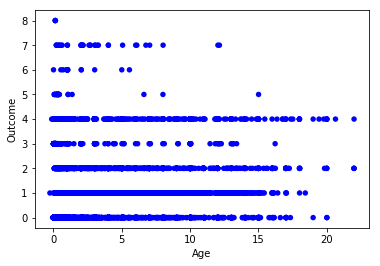

In [262]:
Age = Shelter_cat["cat_age"]
Outcome = Shelter_cat["Outcome_type_num"]
Color = Shelter_cat["color_flag"]

thinkplot.Scatter(Age, Outcome, alpha=1.0)
thinkplot.Config(xlabel='Age',
                 ylabel='Outcome',
                 legend=False)

In [264]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

print("Covariance: ", Cov(Age,Outcome))
print("Correlation: ", Corr(Age,Outcome))

#print("Covariance: ", Cov(Age,Color))
#print("Correlation: ", Corr(Age,Color))

#print("Covariance: ", Cov(Color,Outcome))
#print("Correlation: ", Corr(Color,Outcome))

Covariance:  0.5566571244901255
Correlation:  0.20375020966935173


Covariance:  -0.034375653614923785
Correlation:  -0.036368903999916706


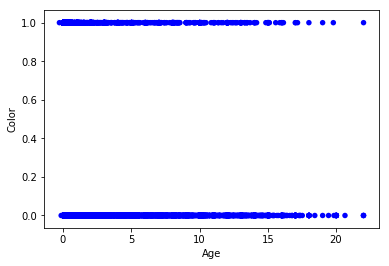

In [265]:
thinkplot.Scatter(Age, Color, alpha=1.0)
thinkplot.Config(xlabel='Age',
                 ylabel='Color',
                 legend=False)
print("Covariance: ", Cov(Age,Color))
print("Correlation: ", Corr(Age,Color))

### Part 8

Hypothesis Test

In [274]:
#So we are trying to test to see if the outcomes are the same. 
#Thus we are taking the average of the outcomes for black cats and other cats. 
#We assume that there is no difference as our null hypothesis.
#The p-value is less than 0.05 and thus statistically significant and we reject the null hypothesis.
#Thus, Black cats have different outcomes than not black cats.

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

data = Black_Cats.Outcome_type_num, Other_Cats.Outcome_type_num

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.041

### Part 9

Regression Analysis

In [273]:
import statsmodels.formula.api as smf

formula = "Outcome_type_num ~ color_flag"
model = smf.ols(formula, data=Shelter_cat)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Outcome_type_num   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.228
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0398
Time:                        19:54:12   Log-Likelihood:                -42158.
No. Observations:               29421   AIC:                         8.432e+04
Df Residuals:                   29419   BIC:                         8.434e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7902      0.006    123.673      0.000       0.778       0.803
color_flag    -0.0346      0.017     -2.056      0.040      -0.068      -0.002
==============================================================================
Omnibus:                    12080.747   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51677.789
Skew:                           2.030   Prob(JB):                         0.00
Kurtosis:                       8.067   Cond. No.                         2.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""